## USE CASE - Download data from any dataset stored in CMEMS with active Opendap Service
<a target="_blank" href="https://colab.research.google.com/github/aragong/cmems_opendap/blob/main/cmems_opendap.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

- Define initial data (dataset, cmems_user, and cmems_password)
- Load complete dataset indexes using pydap and xarray
- Subset required data (nearest data point to longitude and latitude [-6.58,36.88] and specific time range [year 1999])
- Plot example
- Export to netcdf
- Convert to pandas DataFrame
- Export to other formats from DataFrame (csv, json, html...)


Author: [German Aragon](https://ihcantabria.com/en/directorio-personal/investigador/german-aragon/) @ [IHCantabria](https://github.com/IHCantabria)

In [1]:
# Define dataset, username and password
dataset_id = "cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H"
username = "garagon" 
password = "wrHZeS5V"

If you are using GOOGLE COLAB, uncoment **`!pip install pydap`** in the next cell before running.

In [2]:
# Uncomment line below if you are using Google Colab
# !pip install pydap

import xarray as xr
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
# Function to access pydata stores from CMEMS modified by me
def _copernicusmarine_datastore(dataset, username, password):
    __author__ = "Copernicus Marine User Support Team"
    __copyright__ = "(C) 2021 E.U. Copernicus Marine Service Information"
    __credits__ = ["E.U. Copernicus Marine Service Information"]
    __license__ = "MIT License - You must cite this source"
    __version__ = "202104"
    __maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
    __email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"
    from pydap.cas.get_cookies import setup_session
    from pydap.client import open_url

    cas_url = "https://cmems-cas.cls.fr/cas/login"
    session = setup_session(cas_url, username, password)
    try:
        session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"])
    except:
        raise ValueError(f"\033[1;31mUsername or/and password are incorrect!\033[0;0m\n")

    database = ["my", "nrt"]
    url = f"https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}"
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    except:
        url = f"https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}"
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    
    print(f"\033[1;32m'{username}' is successfully connected to '{dataset_id}'\033[0;0m\n")
    return data_store

# Funcion to save Dataset object in multiple netcdf files by day
def to_daily_netcdf(ds: xr.Dataset, output_path: str, netcdf_format: str=None):
    from pathlib import Path

    output_path = str(Path(output_path).resolve())
    output_dir = str(Path(output_path).parent)
    filename, file_ext = str(Path(output_path).stem), str(Path(output_path).suffix)
    
    date, datasets = zip(*ds.groupby("time.date"))
    paths = [f"{output_dir}/{filename}_{d}{file_ext}" for d in date]
    xr.save_mfdataset(datasets, paths, format=netcdf_format)
    return paths


In [4]:
# Connect to datastore
data_store = _copernicusmarine_datastore(dataset_id, username, password)
ds = xr.open_dataset(data_store)
ds

'garagon' is successfully connected to 'cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H'



<xarray.Dataset>
Dimensions:                         (lat: 1440, lon: 2880, time: 20328)
Coordinates:
  * lat                             (lat) float32 -89.94 -89.81 ... 89.81 89.94
  * lon                             (lon) float32 -179.9 -179.8 ... 179.8 179.9
  * time                            (time) datetime64[ns] 2020-07-01 ... 2022...
Data variables: (12/27)
    eastward_wind                   (time, lat, lon) float32 ...
    eastward_wind_bias              (time, lat, lon) float32 ...
    eastward_wind_sdd               (time, lat, lon) float32 ...
    northward_wind                  (time, lat, lon) float32 ...
    northward_wind_bias             (time, lat, lon) float32 ...
    northward_wind_sdd              (time, lat, lon) float32 ...
    ...                              ...
    stress_curl                     (time, lat, lon) float64 ...
    stress_curl_bias                (time, lat, lon) float64 ...
    stress_curl_dv                  (time, lat, lon) float64 ...
    air_density                     (time, lat, lon) float32 ...
    number_of_observations          (time, lat, lon) float32 ...
    number_of_observations_divcurl  (time, lat, lon) float32 ...
Attributes: (12/26)
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    keywords:                   ocean winds, wind speed, wind direction, wind...
    Conventions:                CF-1.6, ACDD-1.3
    project:                    Copernicus Marine Service Wind Thematic Assem...
    institution:                Royal Netherlands Meteorological Institute (K...
    ...                         ...
    time_coverage_start:        2022-10-25T23:00:00
    time_coverage_end:          2022-10-25T23:00:00
    references:                 Copernicus Marine Service Product User Manual...
    history:                    N/A
    date_created:               2022-10-26T10:33:53
    date_modified:              2022-10-26T10:33:53

In [9]:
# Make temporal subset
subset_ds = ds.sel(time=slice(datetime(2022,7,1), datetime(2022,7,2)))
subset_ds

<xarray.Dataset>
Dimensions:                         (lat: 1440, lon: 2880, time: 25)
Coordinates:
  * lat                             (lat) float32 -89.94 -89.81 ... 89.81 89.94
  * lon                             (lon) float32 -179.9 -179.8 ... 179.8 179.9
  * time                            (time) datetime64[ns] 2022-07-01 ... 2022...
Data variables: (12/27)
    eastward_wind                   (time, lat, lon) float32 ...
    eastward_wind_bias              (time, lat, lon) float32 ...
    eastward_wind_sdd               (time, lat, lon) float32 ...
    northward_wind                  (time, lat, lon) float32 ...
    northward_wind_bias             (time, lat, lon) float32 ...
    northward_wind_sdd              (time, lat, lon) float32 ...
    ...                              ...
    stress_curl                     (time, lat, lon) float64 ...
    stress_curl_bias                (time, lat, lon) float64 ...
    stress_curl_dv                  (time, lat, lon) float64 ...
    air_density                     (time, lat, lon) float32 ...
    number_of_observations          (time, lat, lon) float32 ...
    number_of_observations_divcurl  (time, lat, lon) float32 ...
Attributes: (12/26)
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    keywords:                   ocean winds, wind speed, wind direction, wind...
    Conventions:                CF-1.6, ACDD-1.3
    project:                    Copernicus Marine Service Wind Thematic Assem...
    institution:                Royal Netherlands Meteorological Institute (K...
    ...                         ...
    time_coverage_start:        2022-10-25T23:00:00
    time_coverage_end:          2022-10-25T23:00:00
    references:                 Copernicus Marine Service Product User Manual...
    history:                    N/A
    date_created:               2022-10-26T10:33:53
    date_modified:              2022-10-26T10:33:53

In [10]:
# Select 1 variable of the 17 available
subset_ds = subset_ds.get(["eastward_wind","northward_wind"])

# # You need to use dataset class to write in several netcdf files... I do not know if you can do it with datarray class.
# subset_ds = subset_ds.to_dataset()

# Make spatial subset to nearest input point
subset_ds = subset_ds.sel(lon=-3.75, lat=43.48, method="nearest")
subset_ds

<xarray.Dataset>
Dimensions:         (time: 25)
Coordinates:
    lat             float32 43.44
    lon             float32 -3.688
  * time            (time) datetime64[ns] 2022-07-01 ... 2022-07-02
Data variables:
    eastward_wind   (time) float32 ...
    northward_wind  (time) float32 ...
Attributes: (12/26)
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    keywords:                   ocean winds, wind speed, wind direction, wind...
    Conventions:                CF-1.6, ACDD-1.3
    project:                    Copernicus Marine Service Wind Thematic Assem...
    institution:                Royal Netherlands Meteorological Institute (K...
    ...                         ...
    time_coverage_start:        2022-10-25T23:00:00
    time_coverage_end:          2022-10-25T23:00:00
    references:                 Copernicus Marine Service Product User Manual...
    history:                    N/A
    date_created:               2022-10-26T10:33:53
    date_modified:              2022-10-26T10:33:53

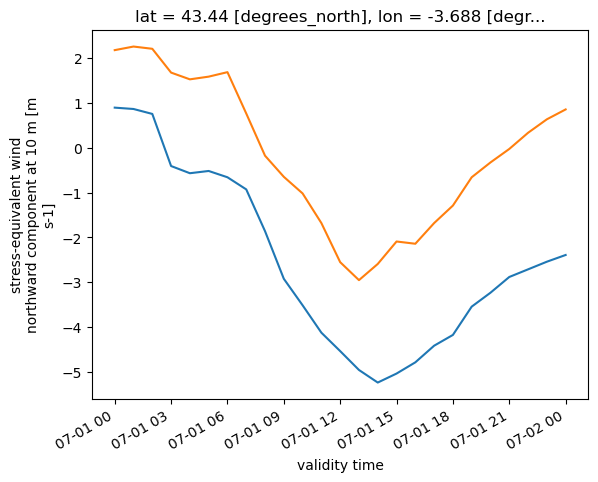

In [15]:
# Plot
subset_ds["eastward_wind"].plot()
subset_ds["northward_wind"].plot()

df = subset_ds.to_dataframe()
df.to_csv("wind.csv")

In [48]:
# Write netcdf
subset_ds.to_netcdf("VHM0.nc")

# Write daily netcdf
paths = to_daily_netcdf(ds = subset_ds, output_path="VHM0.nc")

In [49]:
# Convert to Pandas DataFrame
df = subset_ds.to_dataframe()
df

,latitude,longitude,VHM0
time,,,
1999-01-01 00:00:00,36.900002,-6.6,2.28
1999-01-01 01:00:00,36.900002,-6.6,2.17
1999-01-01 02:00:00,36.900002,-6.6,2.09
1999-01-01 03:00:00,36.900002,-6.6,2.02
1999-01-01 04:00:00,36.900002,-6.6,1.98
...,...,...,...
1999-01-31 20:00:00,36.900002,-6.6,0.23
1999-01-31 21:00:00,36.900002,-6.6,0.28
1999-01-31 22:00:00,36.900002,-6.6,0.30


In [50]:
# Export to other formats... 
df.to_csv("VHM0.csv")
df.to_html("VHM0.html")

# Check arguments in libraries docuemntation for more options...
df.to_json("VHM0.json", orient="records", indent=4)